In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.grid_search import GridSearchCV   #Performing grid search
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



def readFiles():
    #Reading files
    X = pd.read_csv("trainingData.txt",sep='\t',header=None)
    Y = pd.read_csv("trainingTruth.txt",sep='\t',header=None)
    Y = np.array(Y).ravel()
    
    return (X,Y)

def preprocessFeatures3( X ):
    print('Preprocessing data (3).')

    # Q: Normalise data for SVMs - what about decision trees?
    

    #Rewrite this from the HW ipython book
    # Replace any NaN in X with the mean of the column
    # Replacing with the mean gives a better score
    xMean = []
    for col in X.columns:
        xMean = X[col].mean()
        #print(col, ' ', xMean)
        X.loc[X[col].isnull(), col] = xMean
    
    # Standardize the data attributes
    #X = preprocessing.scale(X)

    return (X)



XOrig,YOrig = readFiles()
X = preprocessFeatures3(XOrig)

# I think we should maybe split Y into four columns and run preprocessing 4 times maybe?
Y = YOrig


/Users/rob/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/rob/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Preprocessing data (3).


## Check Distribution of Features

Plot a histogram of the distribution of each feature. From this we see that all features are normally distributed.

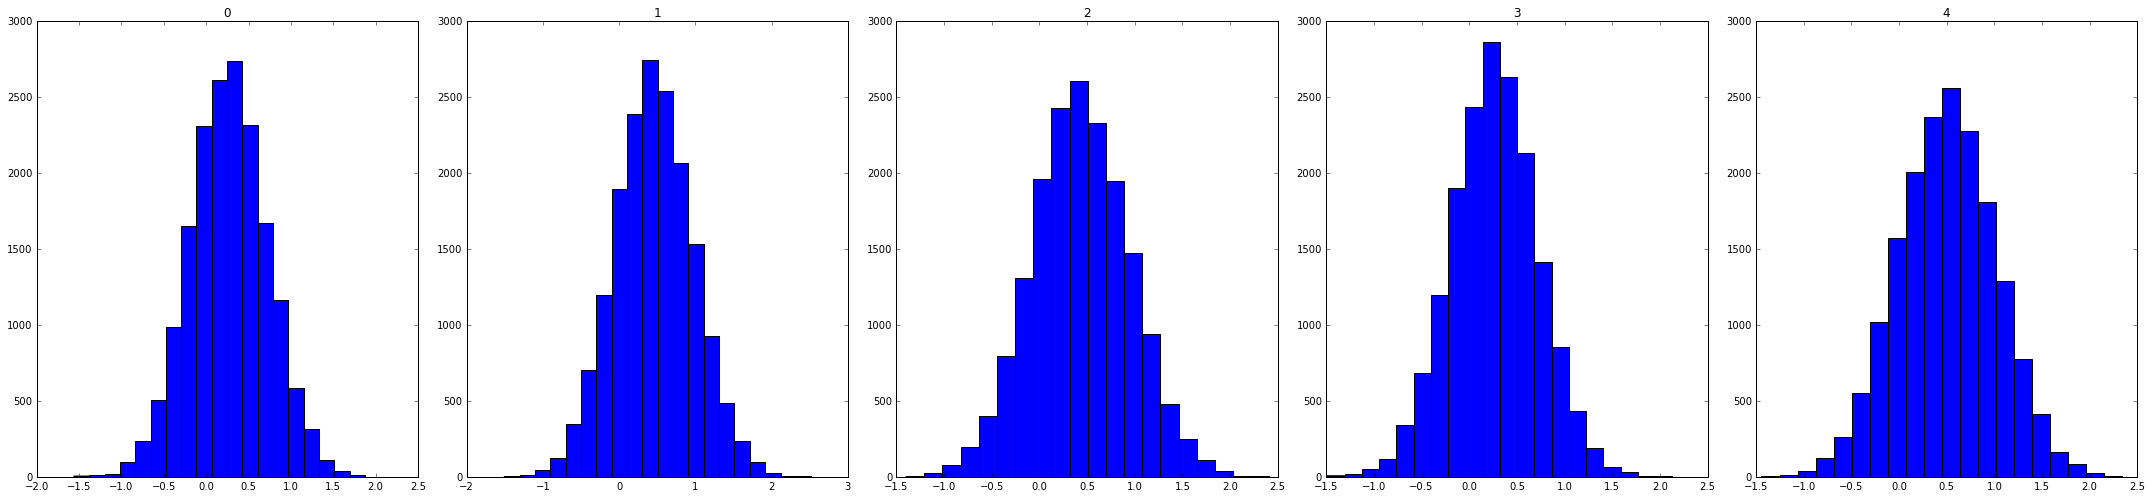

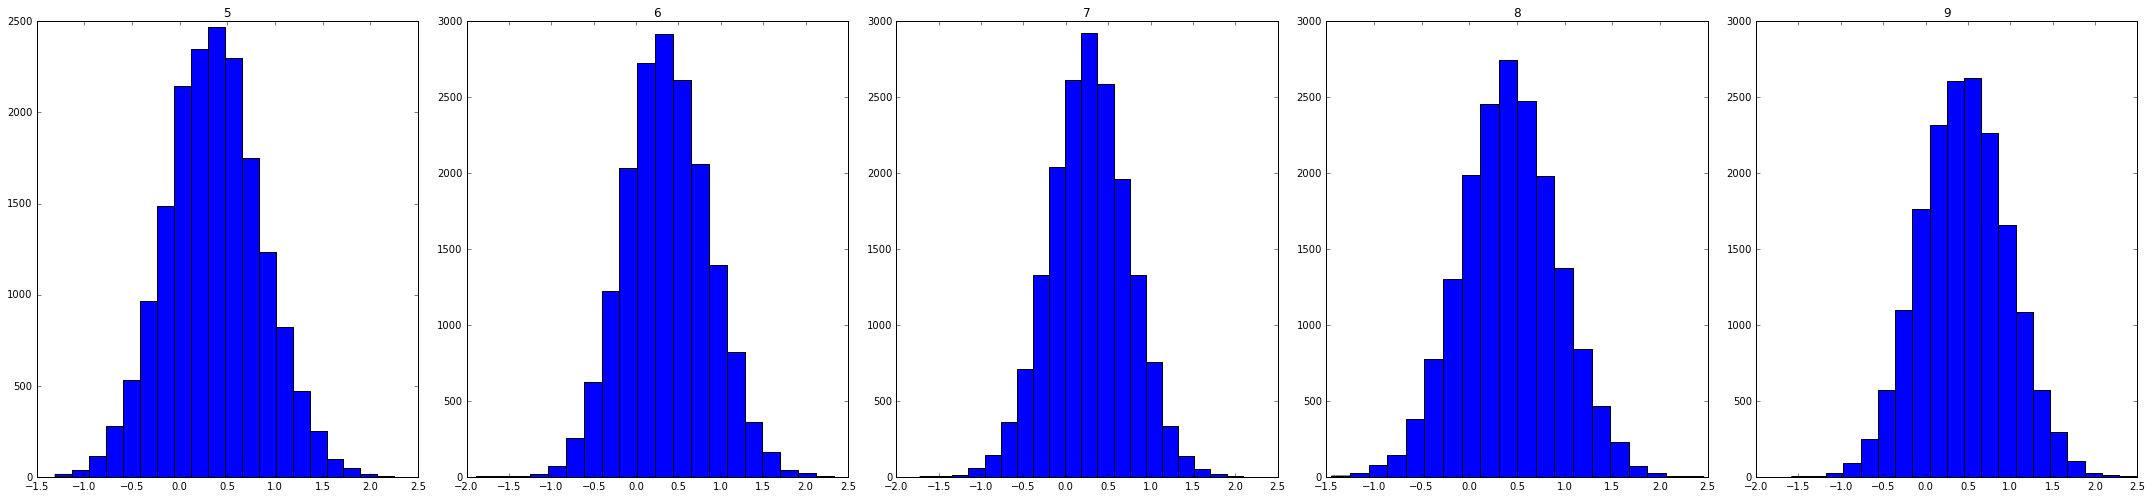

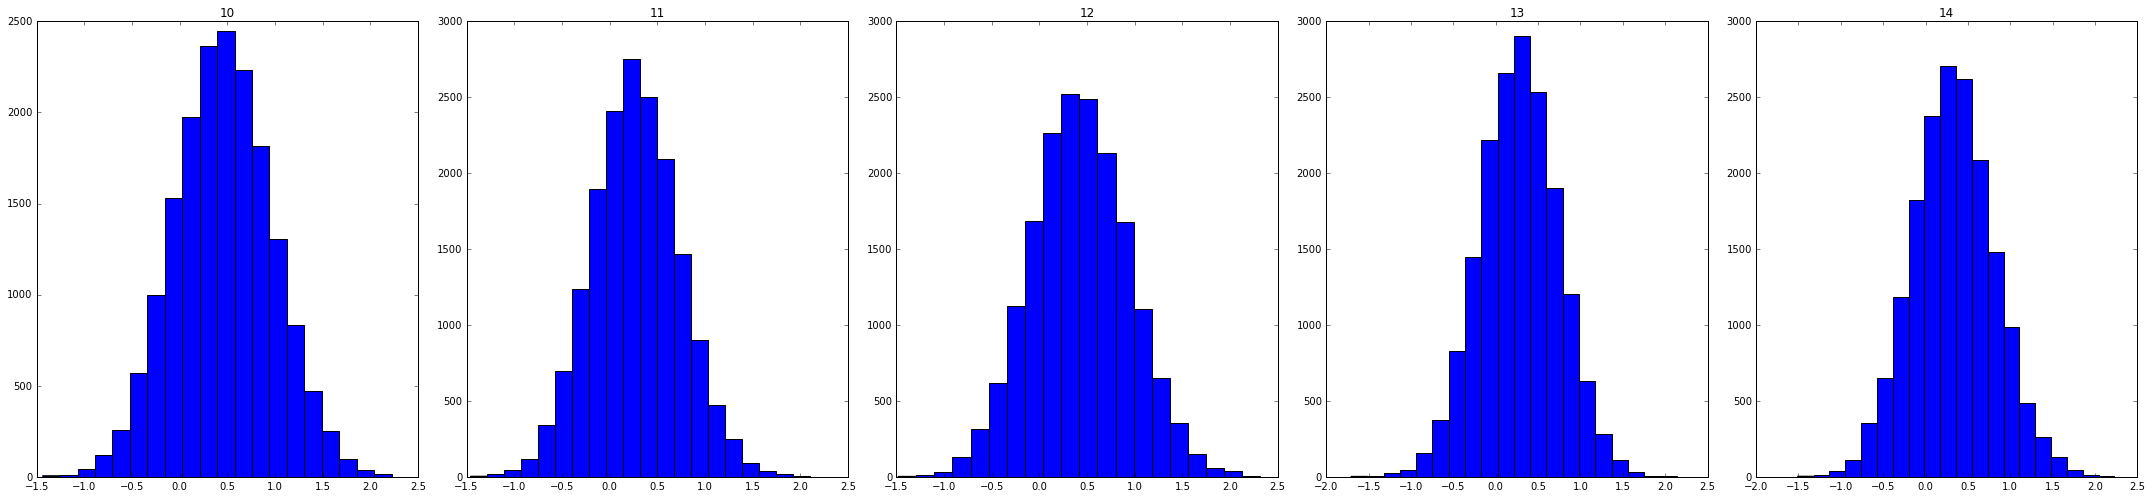

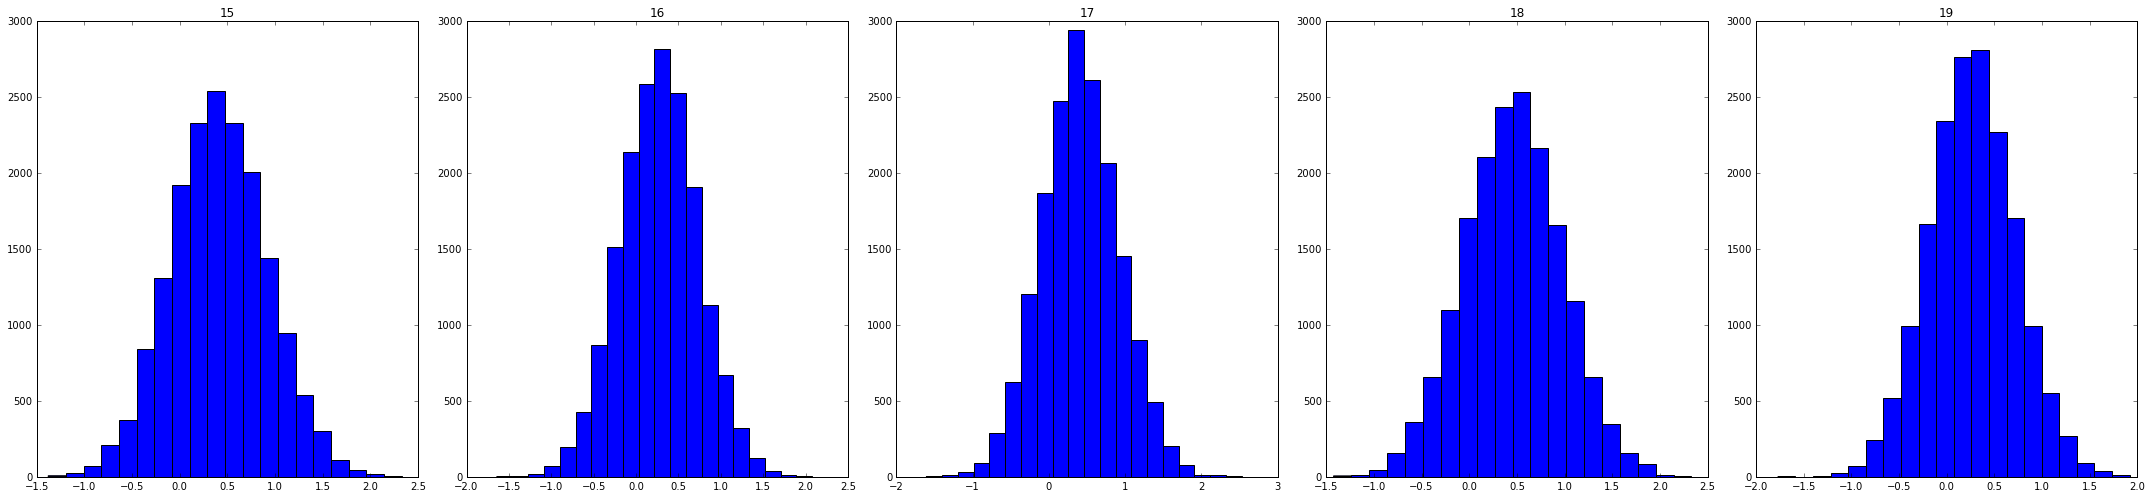

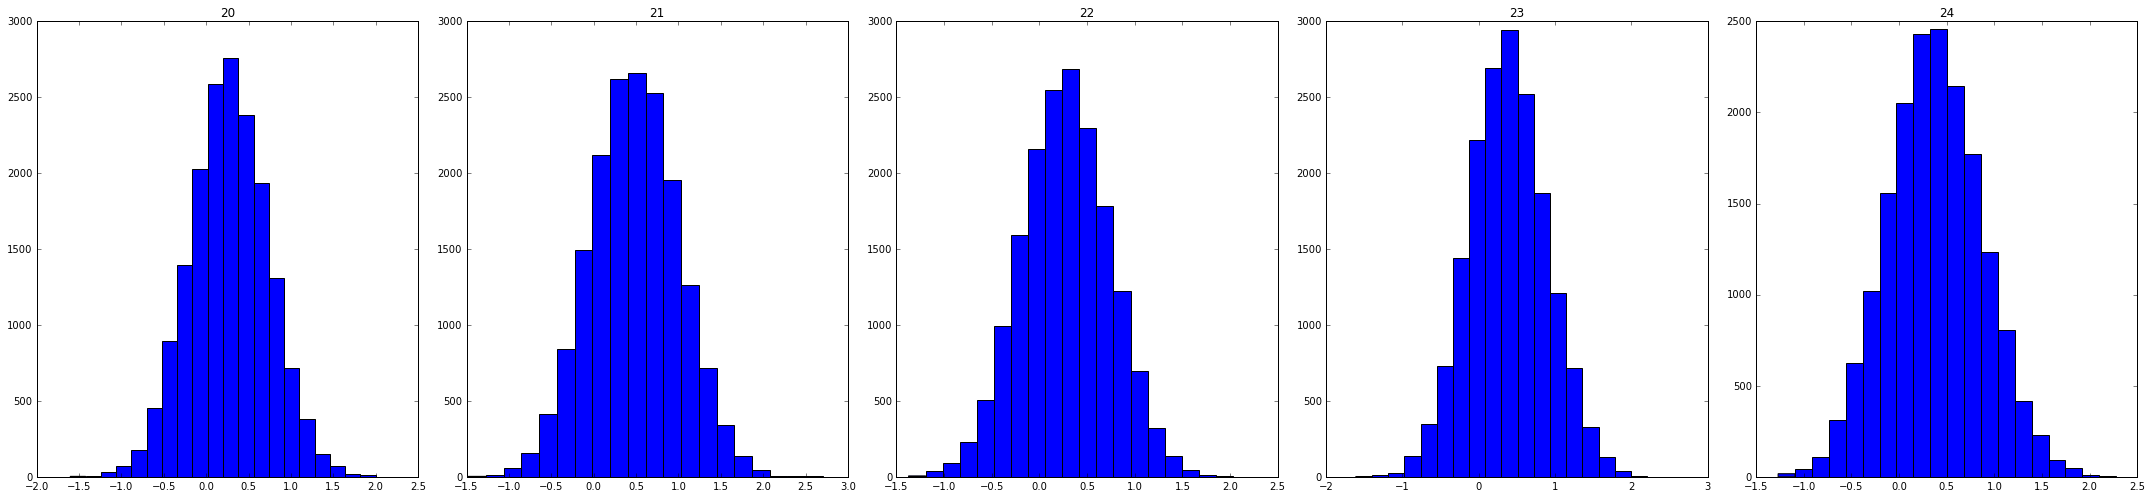

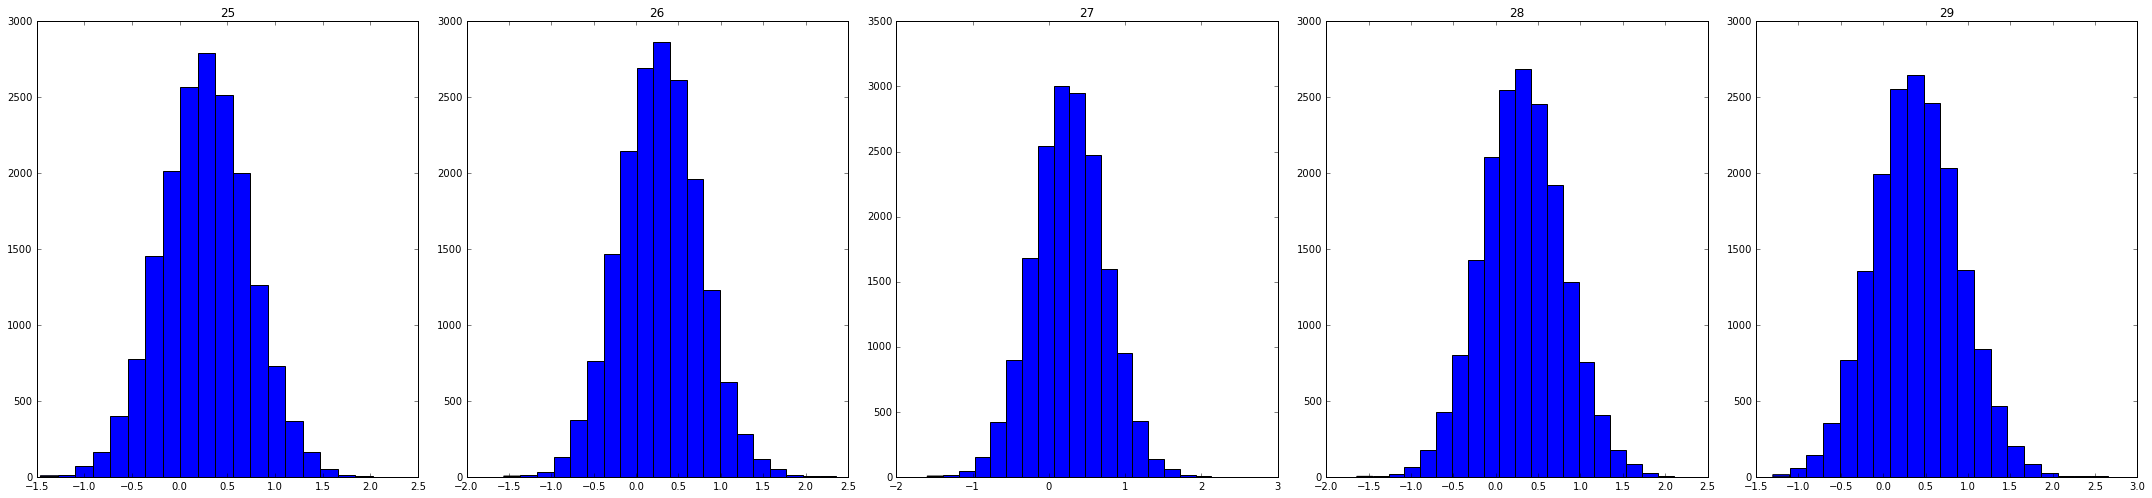

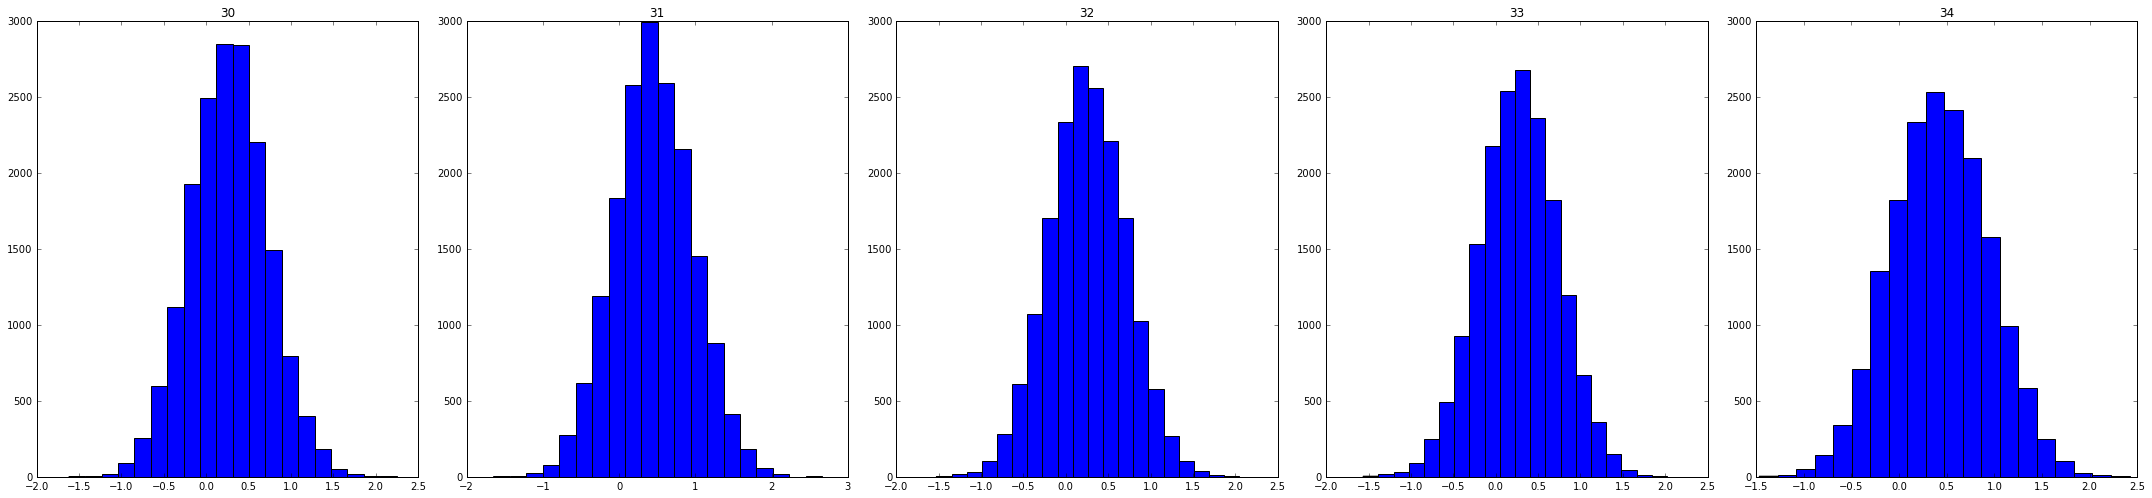

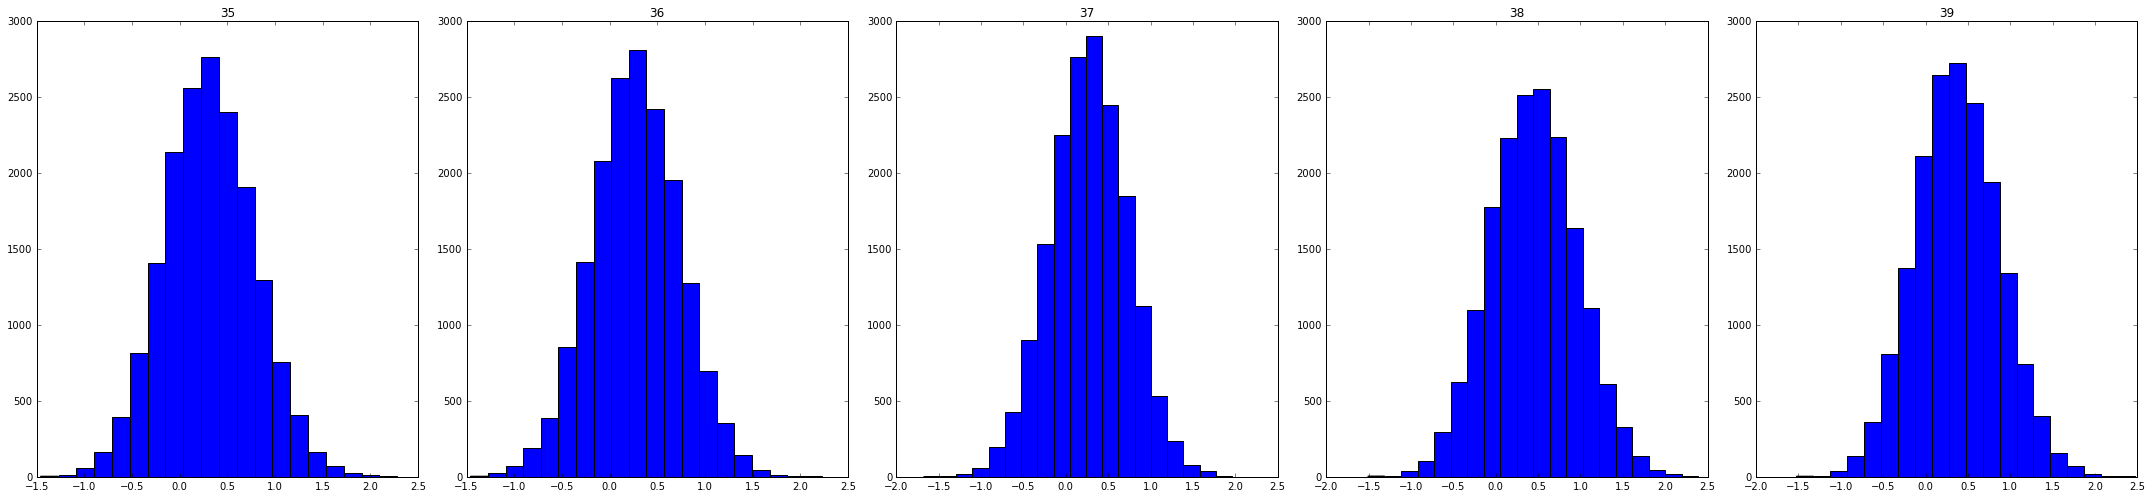

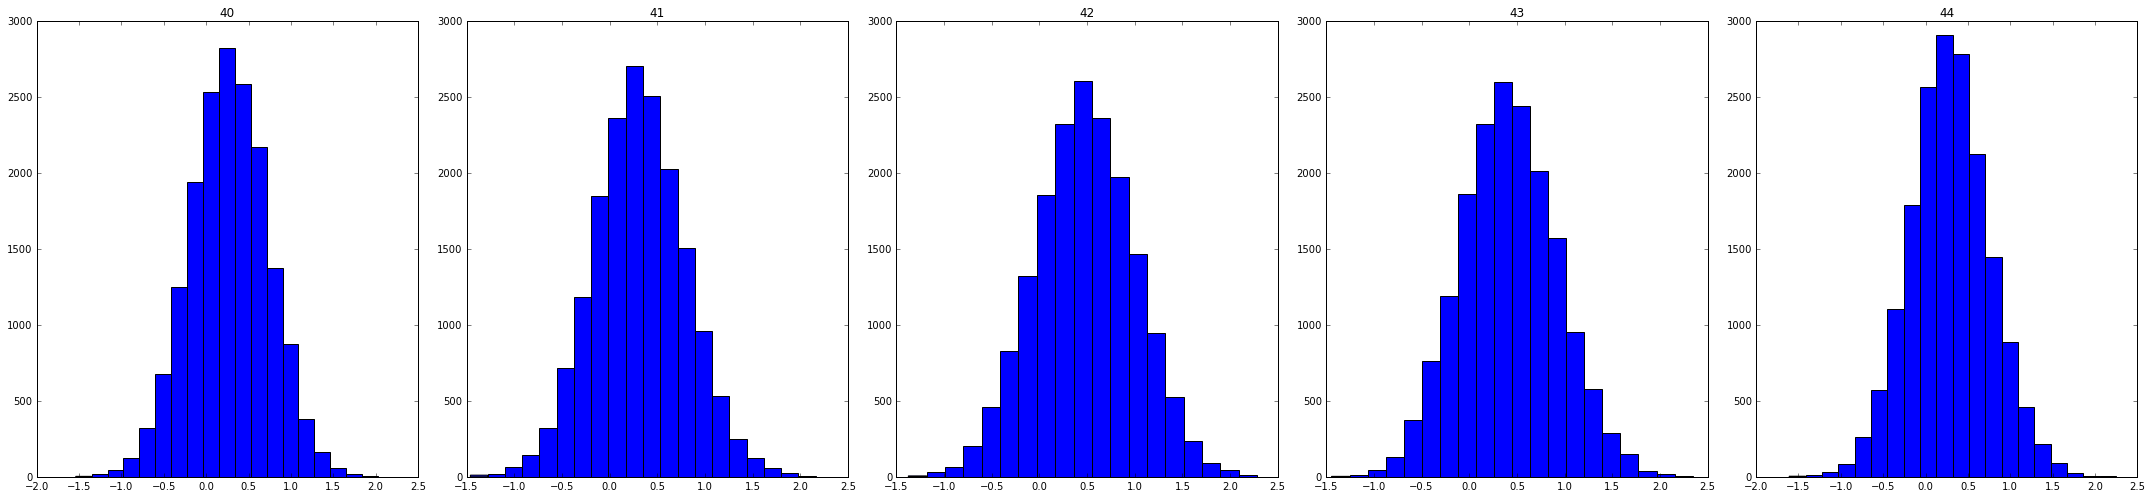

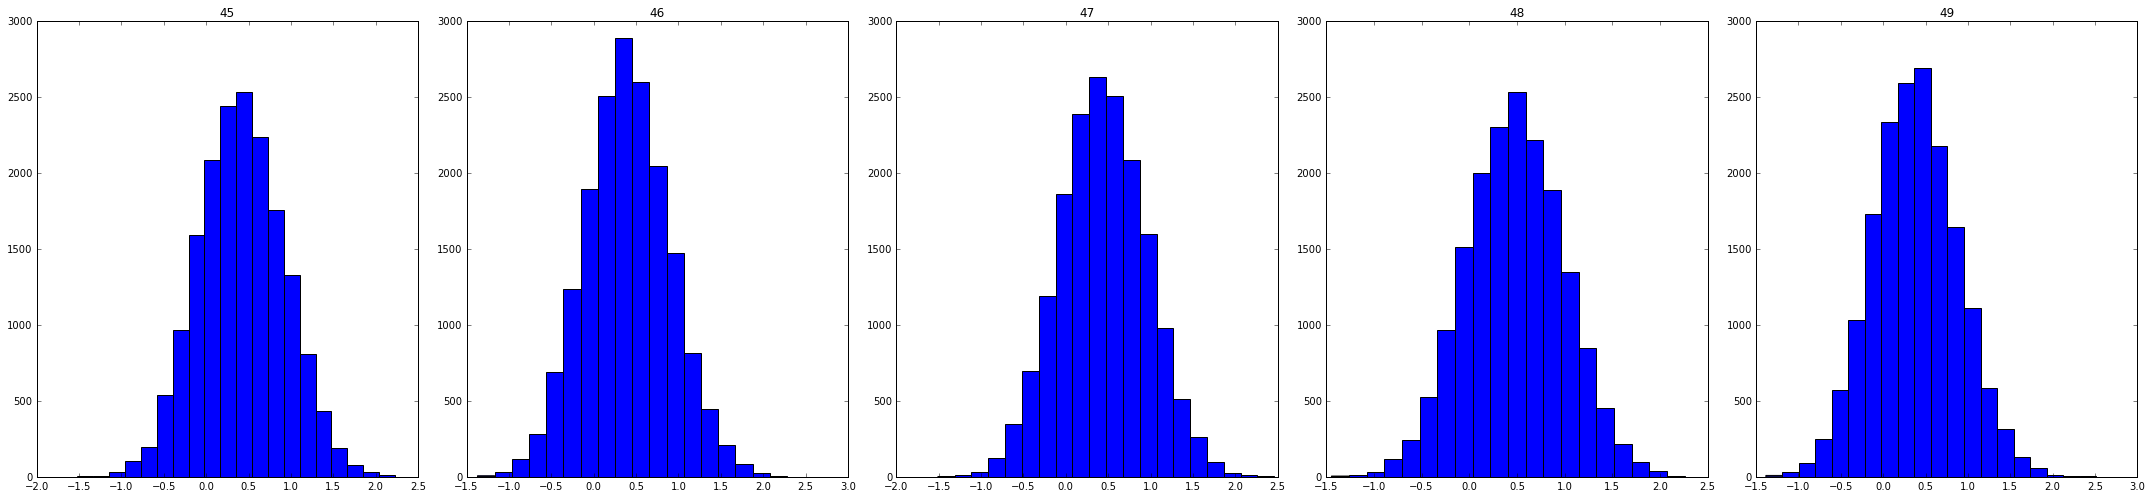

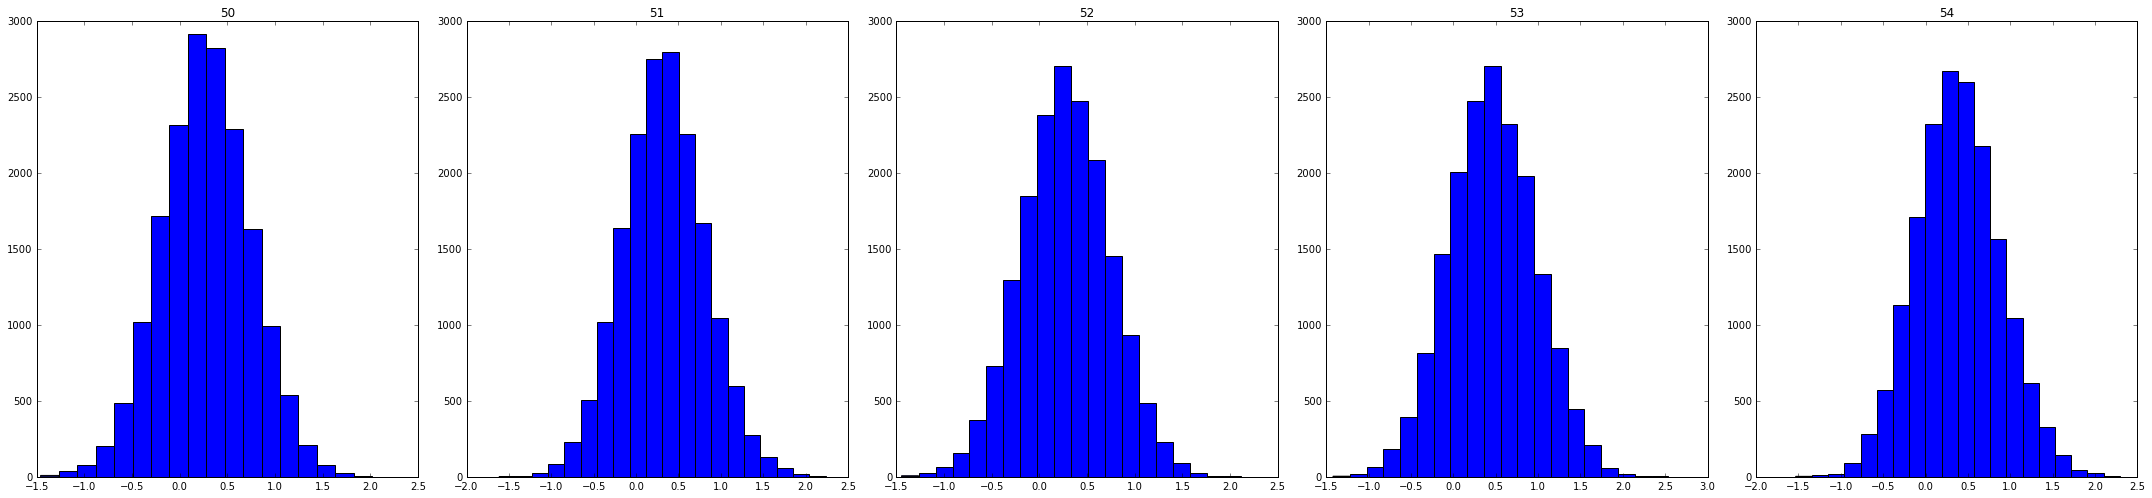

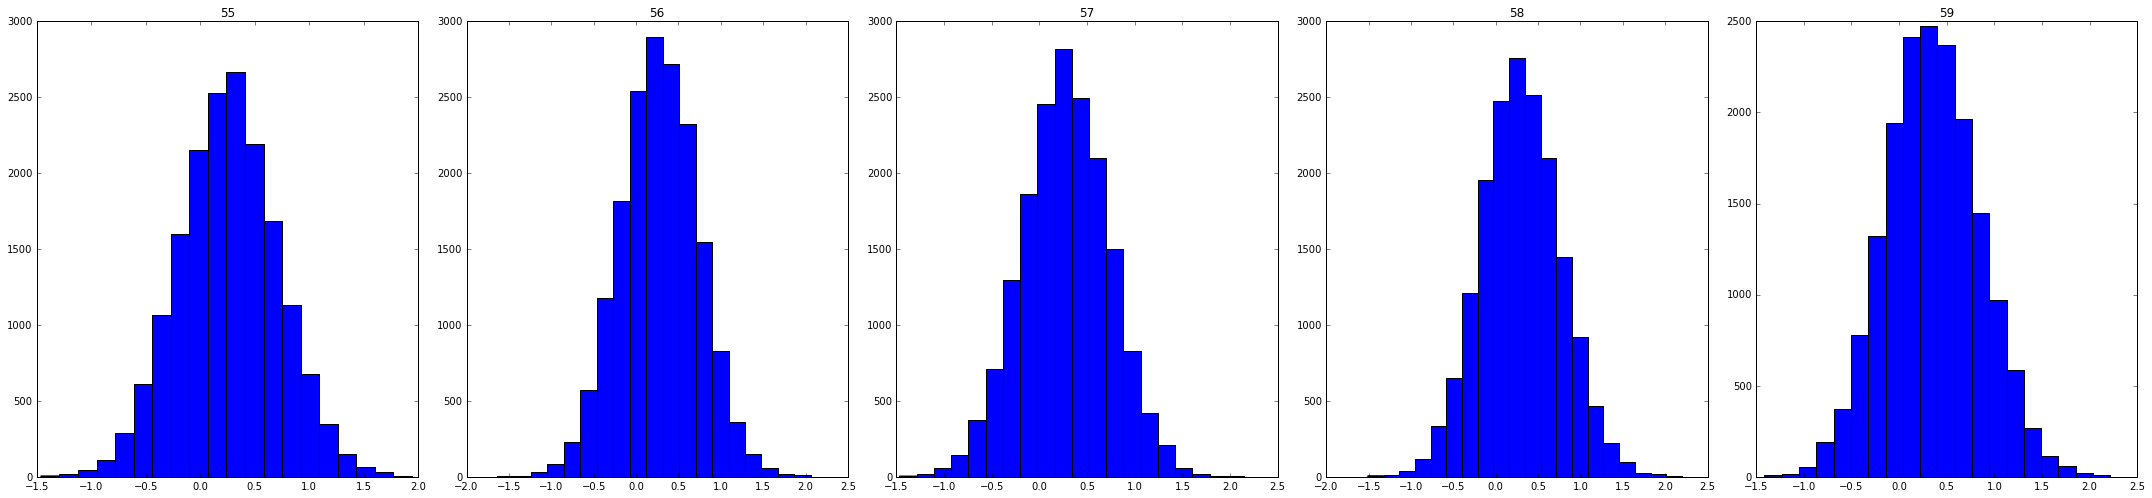

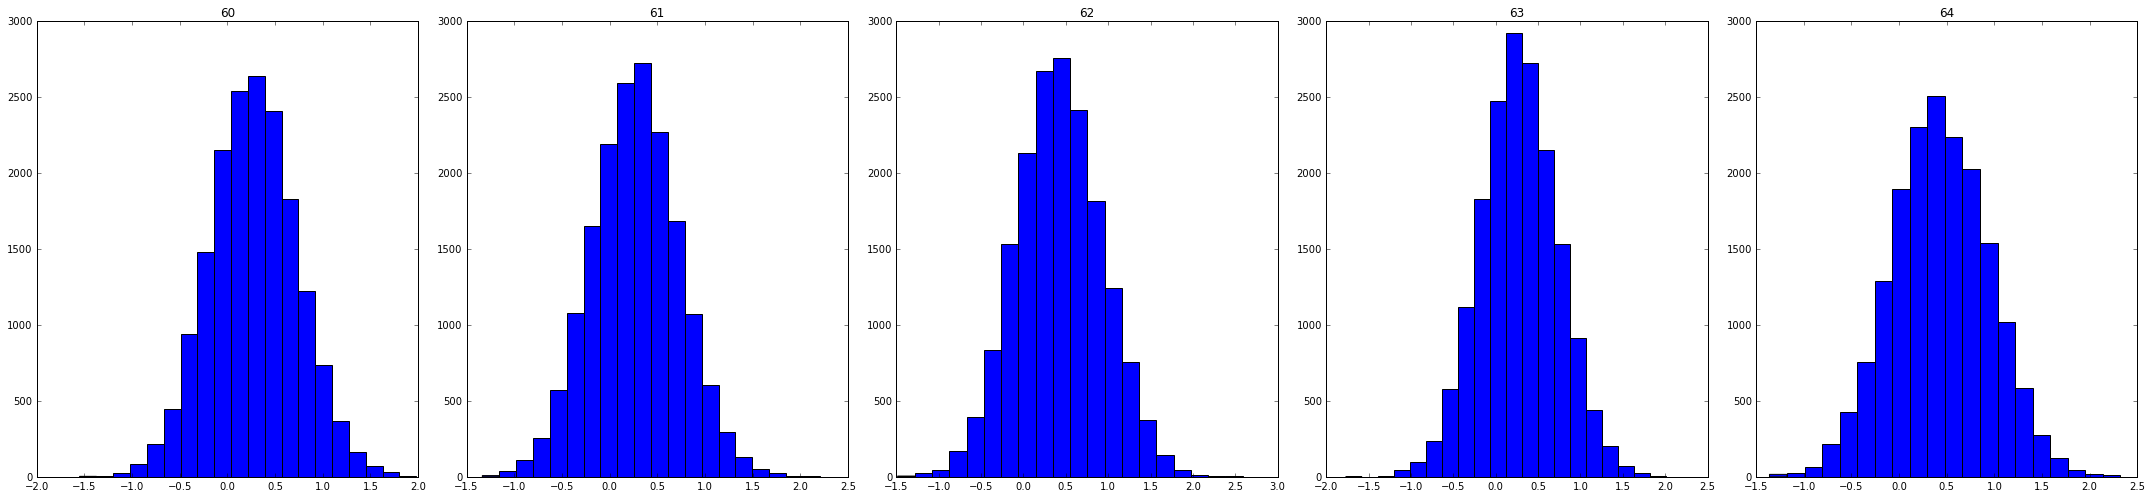

In [ ]:
nCols = 5

# Calculate the number of rows of plots
nRows = (X.columns.size // nCols) + 1

numberFeatures = X.columns.size
featureNumber = 0

# We're going to display a plot of five columns for the first five
# features, and then continue to create more plots until we run out of features.
# This gives better performance than trying to plot all features in the same plot.
for row in range(nRows):
    fig, axes=plt.subplots(figsize=(30,7), nrows=1, ncols=nCols)

    for col in range(nCols):
        featureNumber = (row*nCols)+col
        
        if featureNumber < numberFeatures:
            axes[col].hist(X[featureNumber],bins=20,label='')
            axes[col].set_title(featureNumber)

    plt.tight_layout()
    plt.show()

## Feature Selection

Requires minepy: sudo pip install minepy

Useful info: 
* http://blog.datadive.net/selecting-good-features-part-i-univariate-selection/
* Detecting Novel Associations in Large Data Sets, Rashef
* http://scikit-learn.org/stable/modules/feature_selection.html


In [ ]:
from IPython.display import display, HTML
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from minepy import MINE

def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))

ranks = {}
names = X.columns

importance = {}
for i in range(4):
    importance[i] = pd.DataFrame({'feature': X.columns})
                           
lr = OneVsRestClassifier(LogisticRegression())
lr.fit(X, Y)
for i in range(4):
    importance[i]['LR'] = lr.coef_[i]

dt = OneVsRestClassifier(DecisionTreeClassifier(criterion='gini',max_depth=100))
dt.fit(X,Y)
for i in range(4):
    importance[i]['DT'] = dt.estimators_[i].feature_importances_

# Add Ridge, MINE, SVM

#ridge = Ridge(alpha=7)
#ridge.fit(X, Y)
#ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)


#print(ranks)

for i in range(4):
    header = '<H2>Class: ' + str(i+1) + '</H2><br/>'
    display(HTML(header))
    display(HTML(importance[i].to_html()))

In [ ]:
def featuresToRemove(df, features, threshold):
    numberRows = df.feature.size
    for feature in features:
        for row in range(numberRows):
            if( df[feature])
    